# Exercise 8 

### (a) Data Generation

Generate a set 

$X = \{(y_i, \mathbf{x}_i), \mathbf{x}_i = [x_{i1}, x_{i2}]^T \in \mathbb{R}^2, y_i \in \mathbb{R}, i = 1, \ldots, 200\}$


from the model 


$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \eta$

where $ \eta $ is an i.i.d. normal zero mean noise with variance $ 0.05 $. Use the parameters $ \theta_0 = 3, \theta_1 = 2, \theta_2 = 1, \theta_3 = 1 $ (adopt the strategy given in the example on the second slide of the second lecture). In the sequel, pretend that you do not know the model that generates the data. All you have at your disposal is the data set $ X $.

In [1]:
import numpy as np
import pandas as pd

# Given parameters for the model
theta_0 = 3
theta_1 = 2
theta_2 = 1
theta_3 = 1
n = 200  # Number of data points
noise_variance = 0.05

# Generate random x1 and x2 values from a normal distribution
np.random.seed(23)  # Set seed for reproducibility
x1 = np.random.randn(n)  # 200 samples from a standard normal distribution
x2 = np.random.randn(n)

# Generate noise from a normal distribution
eta = np.random.normal(0, np.sqrt(noise_variance), n)

# Compute the dependent variable y based on the given model
y = theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x1 * x2 + eta

# Combine the data into a DataFrame (y, [x1, x2])
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Show the first few rows of the dataset
data.head()

,x1,x2,y
0,0.666988,0.572950,5.370828
1,0.025813,-0.652938,2.537379
2,-0.777619,1.690587,1.471532
3,0.948634,0.820629,6.964190
4,0.701672,0.109570,4.659354


### (b) Parameter Estimation in the Original Space

Adopting the linear model assumption in the original space (that is, assuming that 

$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$, estimate the parameters of the model $ (\theta_0, \theta_1, \theta_2) $ that minimize the sum of error squares criterion.

#### The given model is: y=θ0+θ1*χ1+θ2*χ2 and it can be written in a matrix form of y=XΘ+η where X is the features matrix and θ is the parameters vector. θ0 θ1 and θ2 will be estimated using least squares method by solving this equation 
$\boldsymbol{\theta} = (X^T X)^{-1} X^T \mathbf{y}$

In [2]:
# Adding a column of ones for the intercept term (theta_0)
X = np.column_stack((np.ones(n), x1, x2))

# Performing Ordinary Least Squares (OLS) to estimate theta
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

theta_hat


array([2.95406672, 1.74273132, 1.05513799])

#### Parameters are: Θ0=2.95, θ1=1.74, θ2=1.05

### (c) Mean Squared Error Calculation

For each of the 200 data points $\mathbf{x}_i$ of $ X $, determine the associated estimate $ \hat{y}_i$ provided by the model estimated in (b) and compute the mean squared error (MSE):

$
MSE = \frac{1}{200} \sum_{i=1}^{200} (y_i - \hat{y}_i)^2
$


In [3]:
# Compute the predicted y values using the estimated parameters
y_hat_b = X @ theta_hat

# Compute the MSE for the model estimated in (b)
mse_b = np.mean((y - y_hat_b) ** 2)

mse_b


0.698987595288398

#### MSE for model in B) is 0.698

### (d) Data Transformation

Apply the transformation 

$
\phi(\mathbf{x}) = 
\begin{bmatrix}
\phi_1(\mathbf{x}) \\
\phi_2(\mathbf{x}) \\
\phi_3(\mathbf{x})
\end{bmatrix} = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_1 \cdot x_2
\end{bmatrix}
$

on all $ \mathbf{x}_i $ of $ X $. Denote by $ \mathbf{x}_i' \in \mathbb{R}^3 $ the image of $ \mathbf{x}_i $ (that is, $\mathbf{x}_i' = \phi(\mathbf{x}_i)) $, and form a new data set 

$
X' = \{(y_i, \mathbf{x}_i'), \mathbf{x}_i' \in \mathbb{R}^3, y_i \in \mathbb{R}, i = 1, \ldots, 200\}
$

In [4]:
# Apply the transformation to include the interaction term
x1_x2 = x1 * x2
X_prime = np.column_stack((np.ones(n), x1, x2, x1_x2))


### (e) Parameter Estimation in the Transformed Space

Adopting the linear model assumption in the transformed space and the sum of error squares criterion, estimate the parameters of the model that minimize this criterion.

In [5]:
# Perform OLS to estimate theta in the transformed space
theta_prime_hat = np.linalg.inv(X_prime.T @ X_prime) @ X_prime.T @ y

theta_prime_hat


array([2.9667611 , 1.99845192, 0.98927105, 0.99921008])

#### The new θ values are θ0=2.97, θ1=1.99, θ2=0.98, θ3=0.99

### (f) Mean Squared Error in the Transformed Space

For each of the 200 data points $\mathbf{x}_i $ of $ X $, determine the associated estimate $ \hat{y}_i $ provided by the model estimated in (e) and compute the mean squared error (MSE):

$
MSE = \frac{1}{200} \sum_{i=1}^{200} (y_i - \hat{y}_i)^2
$


In [6]:
# Compute the predicted y values using the estimated parameters in the transformed space
y_hat_prime = X_prime @ theta_prime_hat

# Compute the MSE for the model estimated in (e)
mse_prime = np.mean((y - y_hat_prime) ** 2)

mse_prime


0.04610768053420683

#### MSE for model in e) is 0.046

### (g) Comments on Results

Comment on the results obtained in (c) and (f).

#### The MSE (Mean Squared Error) of the model that includes the interaction term (0.046) is much lower than the MSE of the simpler linear model (0.699). This shows that the model with the interaction term fits the data much better. Since the true data includes an interaction between 𝑥1 and x2, the model with this term is able to capture the real relationship more accurately. As a result, adding the interaction term gives a more precise estimate of the outcome, y.

# Exercise 9


### (a) Data Generation

Generate a set $ X = \{(y_i, \mathbf{x}_i), \mathbf{x}_i \in \mathbb{R}^2, y_i \in \{-1, +1\}, i = 1, \ldots, 2000\} $ as follows:

- Select 2000 points in the squared area $[-2,2] \times [-2,2]$ of the $\mathbb{R}^2$ space using a uniform distribution.
- All points that lie on the positive side of the curve $ x_2^2 - x_1^2 = 0 $ are assigned to the class $ +1 $, while all the others are assigned to class $ -1 $.

Plot the data using different colors for points from different classes. In the sequel, pretend that you do not know how the data were generated. All you have at your disposal is the data set $ X $.


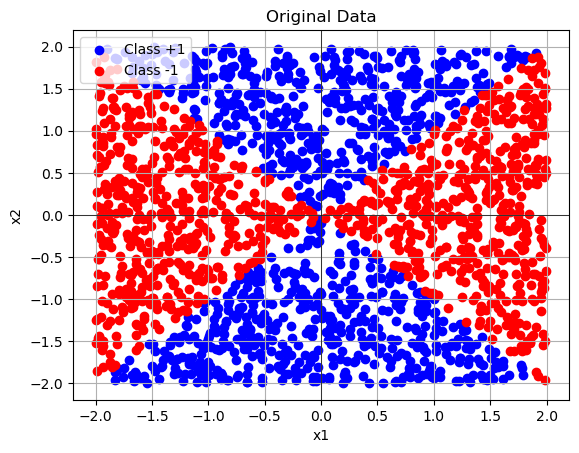

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(123)

# Generating 2000 points uniformly in the square [-2, 2] x [-2, 2]
n_points = 2000
x1 = np.random.uniform(-2, 2, n_points)
x2 = np.random.uniform(-2, 2, n_points)

# Classify points based on the curve x2^2 - x1^2 = 0
y = np.where(x2**2 - x1**2 > 0, 1, -1)  # Assign +1 and -1

# Plot the data
plt.figure()
plt.scatter(x1[y == 1], x2[y == 1], color='blue', label='Class +1')
plt.scatter(x1[y == -1], x2[y == -1], color='red', label='Class -1')
plt.title('Original Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.legend()
plt.show()


### (b) Data Transformation

Apply the transformation 

$
\phi(\mathbf{x}) = 
\begin{bmatrix}
\phi_1(\mathbf{x}) \\
\phi_2(\mathbf{x})
\end{bmatrix} = 
\begin{bmatrix}
x_1^2 \\
x_2^2
\end{bmatrix}
$

on all $ \mathbf{x}_i $ of $ X $. Denoting by $ \mathbf{x}_i' $ the image of $ \mathbf{x}_i $ (that is, $ \mathbf{x}_i' = \phi(\mathbf{x}_i) $), we form a new data set 

$
X' = \{(y_i, \mathbf{x}_i'), i = 1, \ldots, 2000\}
$



In [8]:
# Transformation phi(x) = [x1^2, x2^2]
x1_transformed = x1 ** 2
x2_transformed = x2 ** 2

# Creating new DataFrame
data_transformed = pd.DataFrame({'y': y, 'x1_transformed': x1_transformed, 'x2_transformed': x2_transformed})
data_transformed.head()


,y,x1_transformed,x2_transformed
0,-1,0.617602,0.094825
1,-1,0.731782,0.183121
2,1,1.193762,3.434333
3,1,0.042131,2.359537
4,-1,0.770666,0.498324


### (c) Plotting Transformed Data

Plot the $ \mathbf{x}_i' $ using different colors for points from different classes and compare the resulting plot with that of (a). Comment on the differences between the two plots.

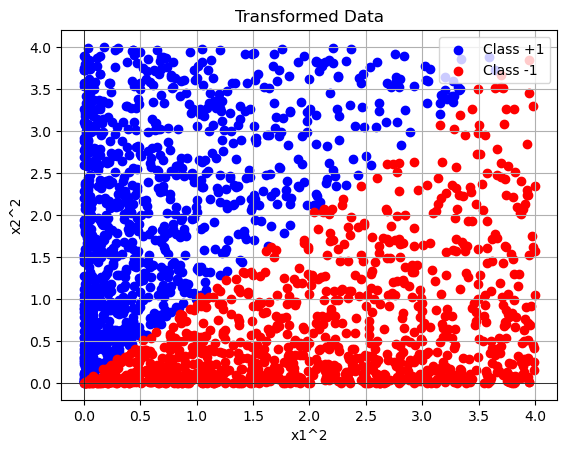

In [9]:
# Plotting the transformed data
plt.figure()
plt.scatter(data_transformed[data_transformed['y'] == 1]['x1_transformed'], 
            data_transformed[data_transformed['y'] == 1]['x2_transformed'], color='blue', label='Class +1')
plt.scatter(data_transformed[data_transformed['y'] == -1]['x1_transformed'], 
            data_transformed[data_transformed['y'] == -1]['x2_transformed'], color='red', label='Class -1')
plt.title('Transformed Data')
plt.xlabel('x1^2')
plt.ylabel('x2^2')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.legend()
plt.show()


### (d) Linear Model Estimation

Adopting the linear model assumption in the transformed space and the sum of error squares criterion, estimate the parameters of the model that minimize this criterion. The model can be expressed mathematically as:

$
\hat{y} = \mathbf{w}^T \mathbf{x}'
$

where $ \mathbf{w} $ represents the parameters of the model, and the error squares criterion is given by:

$
E(\mathbf{w}) = \sum_{i=1}^{2000} (y_i - \hat{y}_i)^2
$

In [10]:
# Preparing the input features and target variable
X_transformed = np.column_stack((np.ones(n_points), x1_transformed, x2_transformed))  # Adding a column of ones for the intercept term
y_transformed = data_transformed['y']

# Performing Ordinary Least Squares (OLS) to estimate theta
theta_hat = np.linalg.inv(X_transformed.T @ X_transformed) @ X_transformed.T @ y_transformed
theta_hat


array([-0.00197116, -0.45545489,  0.47063574])

#### The new θ values are θ0=-0.001, θ1=-0.455, θ2=0.470
